## 2.2.4. aplicação de métodos não supervisionados de estatística multivariada para perceber melhor a estrutura global dos dados;

In [33]:
gse157103 = GEOparse.get_GEO("GSE157103")
metadata = gse157103.phenotype_data

12-Jan-2021 00:48:16 DEBUG utils - Directory ./ already exists. Skipping.
12-Jan-2021 00:48:16 INFO GEOparse - File already exist: using local version.
12-Jan-2021 00:48:16 INFO GEOparse - Parsing ./GSE157103_family.soft.gz: 
12-Jan-2021 00:48:16 DEBUG GEOparse - DATABASE: GeoMiame
12-Jan-2021 00:48:16 DEBUG GEOparse - SERIES: GSE157103
12-Jan-2021 00:48:16 DEBUG GEOparse - PLATFORM: GPL24676
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753021
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753022
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753023
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753024
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753025
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753026
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753027
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753028
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753029
12-Jan-2021 00:48:16 DEBUG GEOparse - SAMPLE: GSM4753030
12-Jan-2021 00:48:16 DEBUG GEOpars

We have performed a Principal Compoment Analysis (PCA) to explore how related our atributes are.

In [34]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

rna_seq_tmp_scaled = preprocessing.scale(rna_seq_tmp.T)
#scale funcion expects samples in rows - transpose

pca0 = PCA()
pca0.fit(rna_seq_tmp_scaled)
x = pca0.transform(rna_seq_tmp_scaled)
per_var=np.round(pca0.explained_variance_ratio_*100,decimals=1)
print(per_var)

[28.5 15.1  3.7  3.   2.8  2.   1.9  1.6  1.4  1.2  1.1  1.   0.9  0.9
  0.8  0.8  0.7  0.7  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.4  0.4  0.4  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0. ]


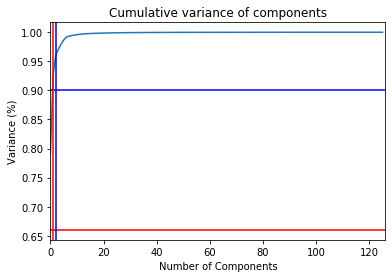

In [35]:
data_scaled = preprocessing.scale(rna_seq_tmp)
components = 126
pca_data = PCA(components)
pca_data.fit(data_scaled)
cumulative_variance = np.cumsum(pca_data.explained_variance_ratio_)

def cumulative_proportion(cumulative_variance):
    run = True
    i = 0
    two_thirds = False
    ninety = False
    while run:
        if cumulative_variance[i] >= 0.66 and two_thirds == False:
            two_thirds = i+1
        if cumulative_variance[i] >= 0.9 and ninety == False:
            ninety = i+1
            run = False
        i += 1
    return two_thirds, ninety

two_thirds, ninety = cumulative_proportion(cumulative_variance)


plt.figure()
plt.plot(np.cumsum(pca_data.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title("Cumulative variance of components")
plt.axhline(y = 0.66, color='r')
plt.axhline(y = 0.9, color='b')
plt.axvline(x = two_thirds, color='r')
plt.axvline(x = ninety, color='b')
plt.xlim(0,components)
plt.show()

Helps chosing the number of components.

[0.28504175 0.15099174 0.03709511]


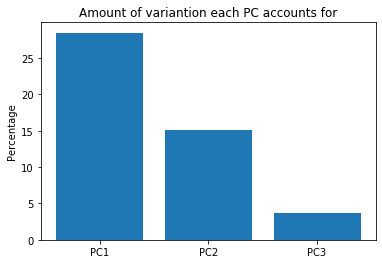

In [36]:
n=3
pca = PCA(n_components=n)
pca.fit(rna_seq_tmp_scaled)
x_reduced = pca.transform(rna_seq_tmp_scaled)
print(pca.explained_variance_ratio_) 

plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Amount of variantion each PC accounts for")
plt.ylabel("Percentage")
plt.show()

In [37]:
genes=rna_seq_tmp.index
loading_scores=pd.Series(pca.components_[0],index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes=sorted_loading_scores[0:10].index.values
print("top_10_genes\n", top_10_genes)

top_10_genes
 ['SART3' 'SCO1' 'QRICH1' 'BAZ1B' 'ATMIN' 'HNRNPR' 'HMG20A' 'WDR33'
 'METAP1' 'NFX1']


Top 10 genes that have explain the most variability in the RNA-seq data 

In [38]:
print("Ratio of influence of PC1 and PC2 on data:",np.cumsum(pca.explained_variance_ratio_)[1]*100,"%")


Ratio of influence of PC1 and PC2 on data: 43.60334874009584 %


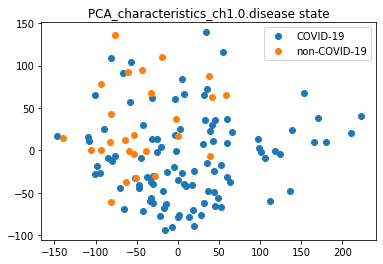

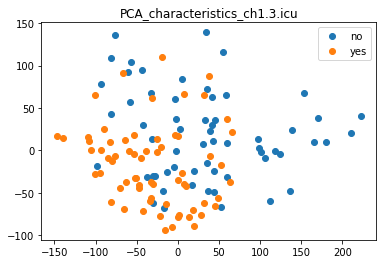

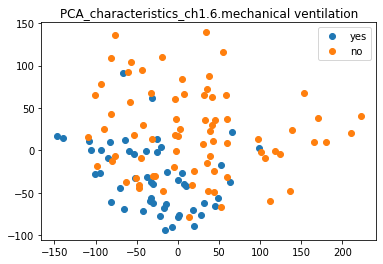

In [39]:
n=2
pca = PCA(n_components=n)
pca.fit(rna_seq_tmp_scaled)
x_reduced = pca.transform(rna_seq_tmp_scaled)

variables = ['characteristics_ch1.0.disease state', 'characteristics_ch1.3.icu', 'characteristics_ch1.6.mechanical ventilation']

for i in variables:
    for j in metadata[i].unique():
        st = metadata[i] == j
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=j)
       
    plt.title("PCA_" + i)
    plt.legend(loc='best', shadow=False)
    plt.show()


Primeiramente foram realizadas as análises aos componentes principais das variáveis presentes nos metadados. No caso das variáveis qualitativas, o disease state, o internamento em cuidados intensivos e ventilação mecânica foi possível discriminar facilmente uma ligeira separação dos diferentes atributos testados. 

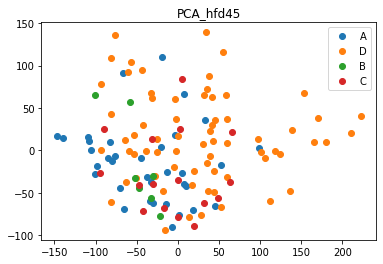

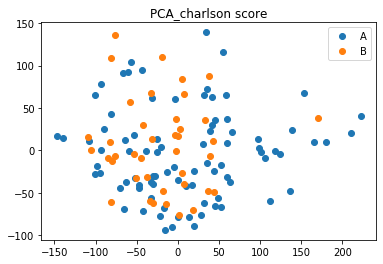

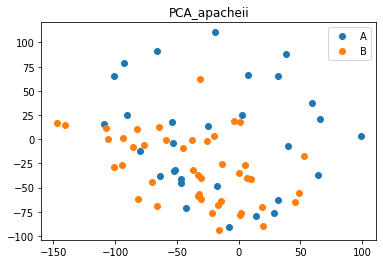

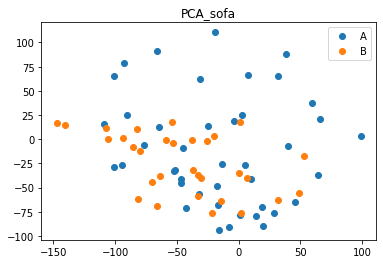

In [40]:
#Convert String numbers to Integer in Pandas DataFrame

metadata['characteristics_ch1.9.hospital-free days post 45 day followup (days)'] = pd.to_numeric(metadata['characteristics_ch1.9.hospital-free days post 45 day followup (days)'],errors='coerce')

HFD45=[]
for j in metadata['characteristics_ch1.9.hospital-free days post 45 day followup (days)']+1:
    if j >=0 and j <10:
        HFD45.append("A")
    elif j >=10 and j <20:
        HFD45.append("B")
    elif j >=20 and j <30:
        HFD45.append("C")
    else:
        HFD45.append("D")
     
metadata['new_hfd45'] = HFD45

for i in metadata['new_hfd45'].unique():
    st = metadata['new_hfd45'] == i
    st = list(st)
    plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_hfd45")
plt.legend(loc='best', shadow=False)
plt.show()

metadata['characteristics_ch1.5.charlson score'] = pd.to_numeric(metadata['characteristics_ch1.5.charlson score'],errors='coerce')

charl=[]
for j in metadata['characteristics_ch1.5.charlson score']+1:
    if j >=0 and j <6:
        charl.append("A")
    elif j >=6:
        charl.append("B")
     
metadata['new_charl'] = charl
for i in metadata['new_charl'].unique():
    st = metadata['new_charl'] == i
    st = list(st)
    plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_charlson score")
plt.legend(loc='best', shadow=False)
plt.show()

metadata['characteristics_ch1.4.apacheii'] = pd.to_numeric(metadata['characteristics_ch1.4.apacheii'],errors='coerce')

apac=[]
for j in metadata['characteristics_ch1.4.apacheii'] + 1:
    if j >=0 and j <20:
        apac.append("A")
    elif j >=20:
        apac.append("B")
    else:
        apac.append('C')
     
metadata['new_apac'] = apac
for i in metadata['new_apac'].unique():
    if i != 'C':
        st = metadata['new_apac'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_apacheii")
plt.legend(loc='best', shadow=False)
plt.show()


metadata['characteristics_ch1.16.sofa' ] = pd.to_numeric(metadata['characteristics_ch1.16.sofa'],errors='coerce')

sofa=[]
for j in metadata['characteristics_ch1.16.sofa'] + 1:
    if j >=0 and j <10:
        sofa.append("A")
    elif j >=10:
        sofa.append("B")
    else:
        sofa.append('C')
     
metadata['new_sofa'] = sofa
for i in metadata['new_sofa'].unique():
    if i != 'C':
        st = metadata['new_sofa'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_sofa")
plt.legend(loc='best', shadow=False)
plt.show()




Relativamente aos scores de severidade, foram diferenciados, em diferentes categorias, os seus valores. A corresponde aos valores menores de score e B, C e D aos maiores valores, respetivamente. Neste caso nas variáveis APACHEII e SOFA foi possível discriminar mais facilmente uma ligeira separação das categorias. 

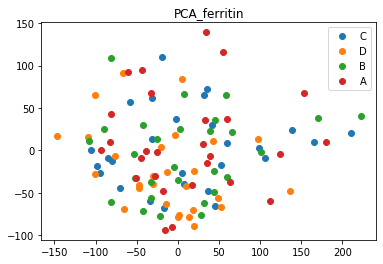

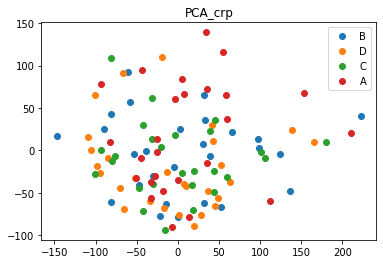

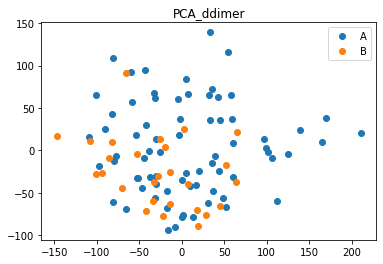

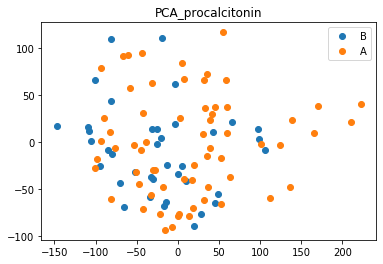

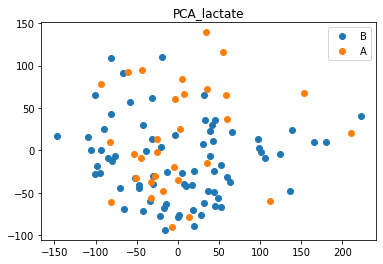

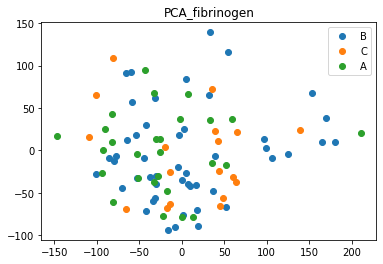

In [41]:
metadata['characteristics_ch1.10.ferritin (ng/ml)'] = pd.to_numeric(metadata['characteristics_ch1.10.ferritin (ng/ml)'],errors='coerce')

ferri=[]
for j in metadata['characteristics_ch1.10.ferritin (ng/ml)']+1:
    if j >=14 and j <220:
        ferri.append("A")
    elif j >=220 and j <580:
        ferri.append("B")
    elif j >=580 and j <1102:
        ferri.append("C")
    elif j >=1102:
        ferri.append("D")
    else:
         ferri.append("E")
          
metadata['new_ferri'] = ferri

for i in metadata['new_ferri'].unique():
    if i != 'E':
        st = metadata['new_ferri'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_ferritin")
plt.legend(loc='best', shadow=False)
plt.show()


metadata['characteristics_ch1.11.crp (mg/l)'] = pd.to_numeric(metadata['characteristics_ch1.11.crp (mg/l)'],errors='coerce')

crp=[]
for j in metadata['characteristics_ch1.11.crp (mg/l)']+1:
    if j >=1 and j <42:
        crp.append("A")
    elif j >=42 and j <119:
        crp.append("B")
    elif j >=119 and j <200:
        crp.append("C")
    elif j >=200:
        crp.append("D")
    else:
        crp.append("E")
     
metadata['new_crp'] = crp

for i in metadata['new_crp'].unique():
    if i != 'E':
        st = metadata['new_crp'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_crp")
plt.legend(loc='best', shadow=False)
plt.show()

metadata['characteristics_ch1.12.ddimer (mg/l_feu)'] = pd.to_numeric(metadata['characteristics_ch1.12.ddimer (mg/l_feu)'],errors='coerce')

ddimer=[]
for j in metadata['characteristics_ch1.12.ddimer (mg/l_feu)']+1:
    if j >=0 and j <11:
        ddimer.append("A")
    elif j >=11:
        ddimer.append("B")
    else:
        ddimer.append("C")
     
  
metadata['new_ddimer'] = ddimer

for i in metadata['new_ddimer'].unique():
    if i != 'C':
        st = metadata['new_ddimer'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_ddimer")
plt.legend(loc='best', shadow=False)
plt.show()


metadata['characteristics_ch1.13.procalcitonin (ng/ml)'] = pd.to_numeric(metadata['characteristics_ch1.13.procalcitonin (ng/ml)'],errors='coerce')

procal=[]

for j in metadata['characteristics_ch1.13.procalcitonin (ng/ml)']+1:
    if j >=0 and j <2:
        procal.append("A")
    elif j >=2:
        procal.append("B")
    else:
        procal.append("C")
     
metadata['new_procal'] = procal

for i in metadata['new_procal'].unique():
    if i != 'C':
        st = metadata['new_procal'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_procalcitonin")
plt.legend(loc='best', shadow=False)
plt.show()


metadata['characteristics_ch1.14.lactate (mmol/l)'] = pd.to_numeric(metadata['characteristics_ch1.11.crp (mg/l)'],errors='coerce')

lac=[]

for j in metadata['characteristics_ch1.14.lactate (mmol/l)']+1:
    if j >=0 and j <50:
        lac.append("A")
    elif j >=50:
        lac.append("B")
    else:
       lac.append("C")
     
metadata['new_lac'] = lac

for i in metadata['new_lac'].unique():
    if i != 'C':
        st = metadata['new_lac'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_lactate")
plt.legend(loc='best', shadow=False)
plt.show()

metadata['characteristics_ch1.15.fibrinogen'] = pd.to_numeric(metadata['characteristics_ch1.15.fibrinogen'],errors='coerce')

fibri=[]
for j in metadata['characteristics_ch1.15.fibrinogen']+1:
    if j >=130 and j <400:
        fibri.append("A")
    elif j >=400 and j <700:
        fibri.append("B")
    elif j >=700:
        fibri.append("C")
    else:    
        fibri.append("D")
     
metadata['new_fibri'] = fibri

for i in metadata['new_fibri'].unique():
    if i != 'D':
        st = metadata['new_fibri'] == i
        st = list(st)
        plt.plot(x_reduced[st,0],x_reduced[st,1], 'o' , label=i)
       
plt.title("PCA_fibrinogen")
plt.legend(loc='best', shadow=False)
plt.show()



Differences along x (PC1) are more important than differences along y (PC2)

O mesmo raciocínio foi aplicado nos biomarcadores. Neste caso apenas nas variáveis d-dimer e lactato se deteta uma separação nas diferentes categorias. 

### Clustering

### Hierarchical Clustering

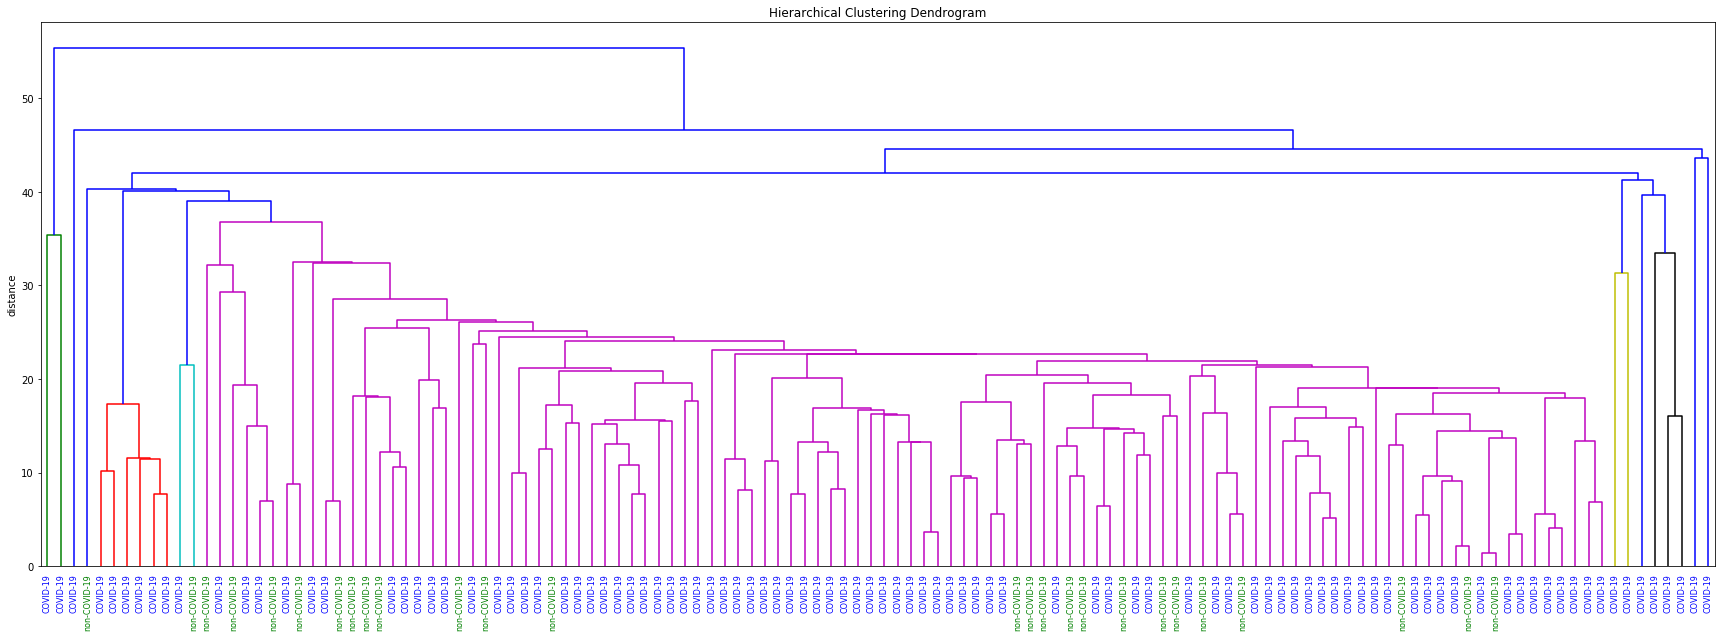

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage 

Z = linkage(x_reduced, metric='cityblock')

plt.figure(figsize=(30, 10))
dendrogram(
    Z,
    labels=list(metadata['characteristics_ch1.0.disease state']),
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'COVID-19':"b", 'non-COVID-19':"g"}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

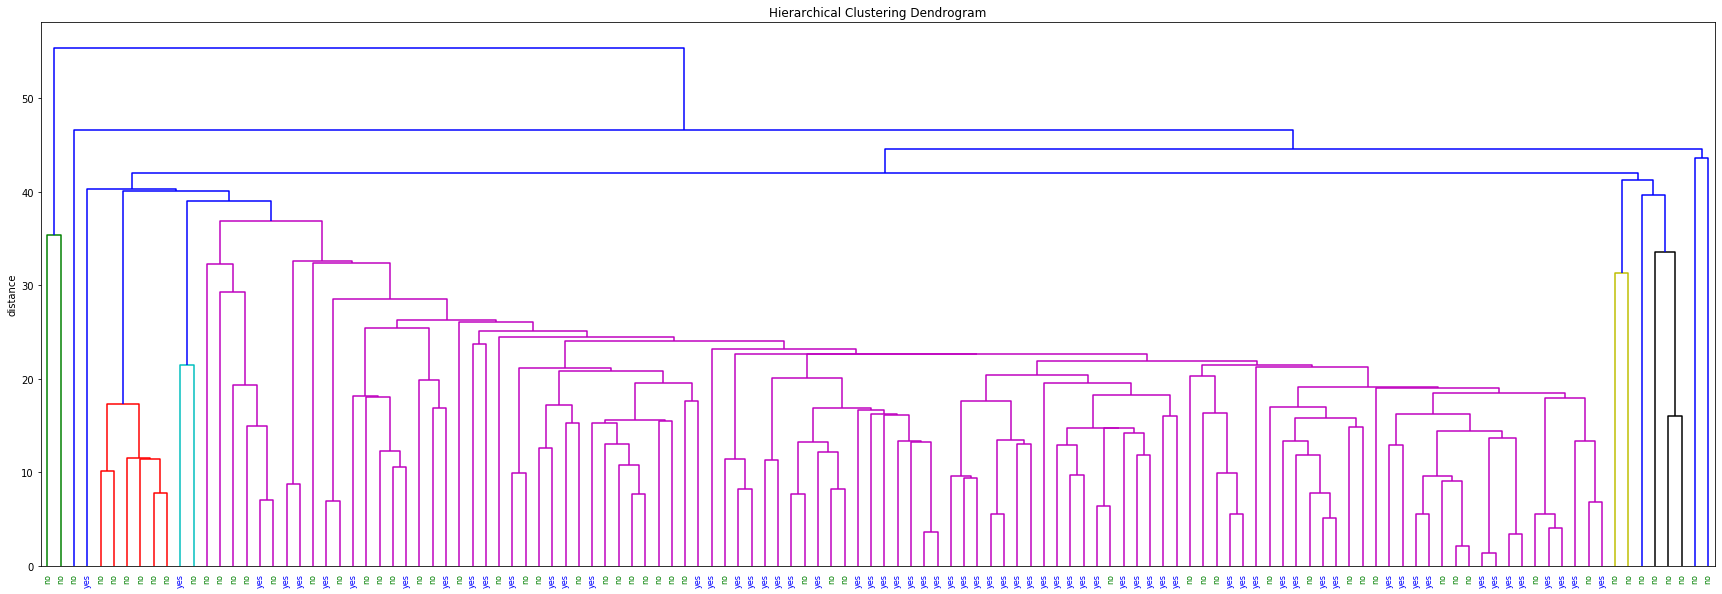

In [43]:
Z = linkage(x_reduced, metric='cityblock')

plt.figure(figsize=(30, 10))
dendrogram(
    Z,
    labels=list(metadata['characteristics_ch1.3.icu']),
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'yes':"b", 'no':"g"}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

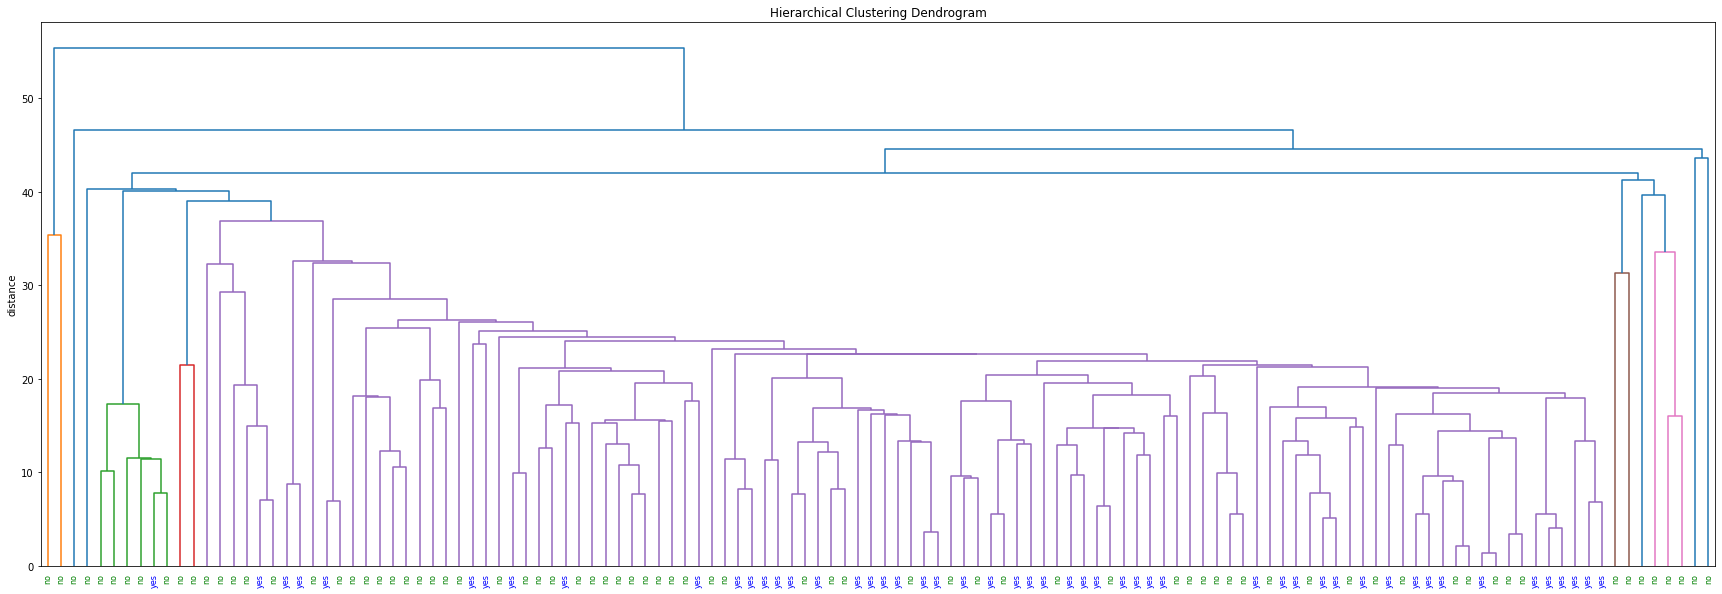

In [67]:
Z = linkage(x_reduced, metric='cityblock')

plt.figure(figsize=(30, 10))
dendrogram(
    Z,
    labels=list(metadata['characteristics_ch1.6.mechanical ventilation']),
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'yes':"b", 'no':"g"}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

Foi realizado o clustering hierárquico para as variáveis qualitativas. Relativamente ao disease state é visível alguns clusters exclusivamente com COVID-19 e não COVID. No caso dos cuidados intensivos também é visível uma separação em clusters constituídos quase na totalidade por um só atributo yes ou no. O mesmo se verifica na ventilação mecânica. 

In [44]:
Z = linkage(x_reduced, metric='cityblock')

 
plt.figure(figsize=(30, 10))
dendrogram(
    Z,
    labels=list(metadata1['new_hfd45']),
    leaf_rotation=90.,
    leaf_font_size=8.,
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'A':"b", 'B':"g", 'C':'w','D':'r'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

NameError: name 'metadata1' is not defined

<Figure size 2160x720 with 0 Axes>

### K-Means

In [78]:
from sklearn.cluster import KMeans

k=2
kmeans_type = KMeans(n_clusters=k, max_iter= 1_000)
kmeans_type.fit(x_reduced)
labels = kmeans_type.labels_
centroids = kmeans_type.cluster_centers_

pd.crosstab(labels, metadata['characteristics_ch1.0.disease state'], rownames=['clusters'])

characteristics_ch1.0.disease state,COVID-19,non-COVID-19
clusters,,
0,61,22
1,39,4


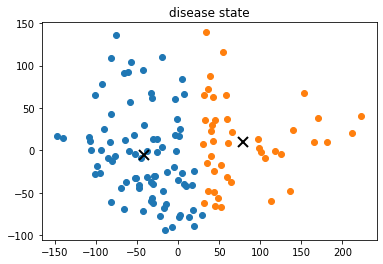

In [79]:
for i in range(k):
    ds = x_reduced[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
    
plt.title('disease state')
plt.show()

In [80]:
k=2
kmeans_type = KMeans(n_clusters=k, max_iter= 1_000)
kmeans_type.fit(x_reduced)
labels = kmeans_type.labels_
centroids = kmeans_type.cluster_centers_

pd.crosstab(labels, metadata['characteristics_ch1.3.icu'], rownames=['clusters'])

characteristics_ch1.3.icu,no,yes
clusters,,
0,25,54
1,35,12


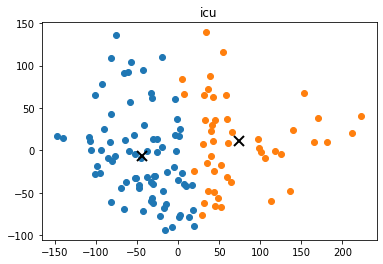

In [81]:
for i in range(k):
    ds = x_reduced[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
    
plt.title('icu')
plt.show()

In [83]:
from sklearn.cluster import KMeans

k=2
kmeans_type = KMeans(n_clusters=k, max_iter= 1_000)
kmeans_type.fit(x_reduced)
labels = kmeans_type.labels_
centroids = kmeans_type.cluster_centers_

pd.crosstab(labels, metadata['characteristics_ch1.6.mechanical ventilation'], rownames=['clusters'])



characteristics_ch1.6.mechanical ventilation,no,yes
clusters,,
0,39,44
1,36,7


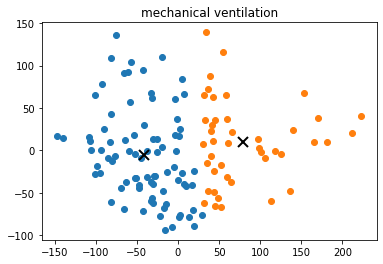

In [84]:
for i in range(k):
    ds = x_reduced[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
    
plt.title('mechanical ventilation')
plt.show()

Para alem do clustering hierárquico determinou-se o k-means para as mesmas variáveis. E no caso das variáveis disease State e ventilação mecânica o cluster 1 é constituído maioritariamente por um dos perfis. No primeiro caso COVID, e na ventilação mecânica não se apresentam este atributo. 